# F1 Practice Session Notebook

## Key Links
- [Pandas Documentation](https://pandas.pydata.org/docs/getting_started/index.html)
- [Setups Explained](https://earlygame.com/gaming/f1-23-setups-explained)

## Notebook Setup

In [235]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/bahrain_myteam_fp1_1.csv', sep='\t')

# get max binIndex
maxBinIndex = df['binIndex'].max()
validLaps = df[df['binIndex'] == maxBinIndex][df['lap_time_invalid'] > -1].reset_index(drop=True)

# camber map
frontCamberMap = {
    -0.0436332: -2.5, 
    -0.0523599: -3.0
}

rearCamberMap = {
    -0.0261799: -1.5,
    -0.0174533: -1.0,
}

# toe map
frontToeMap = {
    0.000872665: 0.05,
    0: 0
}

rearToeMap = {
    0.00436332: 0.25,
    0.00174533: 0.1
}

# Tyre Pressure Map
tyrePressureMap = {
    156511: 22.7,
    139964: 20.3,
    151685: 22.0,
    137895: 20.0,
}

# Visual Compound map
visualCompoundMap = {
    16: 'Soft',
    17: 'Medium',
    18: 'Hard',
    7: 'Intermediate',
    8: 'Wet',
}

# Actual Compound Map
actualCompoundMap = {
    16: 'C5',
    17: 'C4',
    18: 'C3',
    19: 'C2',
    20: 'C1',
    21: 'C0',
    7: 'inter',
    8: 'wet',
}


# Setup Headers
setupHeaders = [
    'lapNum',
    'Front Wing Setup', 
    'Rear Wing Setup', 
    'On Throttle Differential', 
    'Off Throttle Differential', 
    'Front Camber', 
    'Rear Camber', 
    'Front Toe', 
    'Rear Toe',
    'Front Suspension',
    'Rear Suspension',
    'Front Anti-Roll Bar',
    'Rear Anti-Roll Bar',
    'Front Ride Height',
    'Rear Ride Height',
    'Brake Pressure',
    'Brake Bias',
    'Front Left Tyre Pressure',
    'Front Right Tyre Pressure',
    'Rear Left Tyre Pressure',
    'Rear Right Tyre Pressure',
]

setupColumnRename = {
    'wing_setup_0': 'Front Wing Setup', 
    'wing_setup_1': 'Rear Wing Setup', 
    'diff_onThrottle_setup': 'On Throttle Differential', 
    'diff_offThrottle_setup': 'Off Throttle Differential',
    'susp_spring_setup_0': 'Front Suspension',
    'susp_spring_setup_2': 'Rear Suspension',
    'arb_setup_0': 'Front Anti-Roll Bar',
    'arb_setup_1': 'Rear Anti-Roll Bar',
    'susp_height_setup_0': 'Front Ride Height',
    'susp_height_setup_2': 'Rear Ride Height',
}

def highlight_min(x):
   min_val = x.min()
   return ['background-color: purple' if val == min_val else '' for val in x]
    

/var/folders/7v/5sz92nkn6s13fvy6c8bz7_sm0000gn/T/ipykernel_49193/1781236284.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  validLaps = df[df['binIndex'] == maxBinIndex][df['lap_time_invalid'] > -1].reset_index(drop=True)


## Lap Time Data
Lap times from valid laps 

In [240]:
validLaps[['lapNum', 'lap_time']].style.apply(highlight_min, axis=0, subset=['lap_time'])

,lapNum,lap_time
0,0,98.189000
1,1,103.677000
2,2,96.040000
3,3,96.563000
4,4,96.187000
5,11,95.591000
6,12,94.413000
7,13,94.119000


## Setup Data
Setup data from valid laps

In [237]:
setup_df = validLaps.rename(columns=setupColumnRename)
setup_df['Front Camber'] = setup_df['camber_setup_0'].map(frontCamberMap)
setup_df['Rear Camber'] = setup_df['camber_setup_2'].map(rearCamberMap)
setup_df['Front Toe'] = setup_df['toe_setup_0'].map(frontToeMap)
setup_df['Rear Toe'] = setup_df['toe_setup_2'].map(rearToeMap)
setup_df['Brake Pressure'] = setup_df['brake_press_setup'] * 100
setup_df['Brake Bias'] = setup_df['brake_bias_setup'] * 100
setup_df['Front Left Tyre Pressure'] = setup_df['tyre_press_setup_0'].map(tyrePressureMap)
setup_df['Front Right Tyre Pressure'] = setup_df['tyre_press_setup_1'].map(tyrePressureMap)
setup_df['Rear Left Tyre Pressure'] = setup_df['tyre_press_setup_2'].map(tyrePressureMap)
setup_df['Rear Right Tyre Pressure'] = setup_df['tyre_press_setup_3'].map(tyrePressureMap)
setup_df[setupHeaders].transpose()

# TODO combine lap setups based on similar setup values

,0,1,2,3,4,5,6,7
lapNum,0.00,1.00,2.00,3.00,4.00,11.00,12.00,13.00
Front Wing Setup,25.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00
Rear Wing Setup,27.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00
On Throttle Differential,0.65,0.55,0.55,0.55,0.55,0.55,0.55,0.55
Off Throttle Differential,0.55,0.52,0.52,0.52,0.52,0.52,0.52,0.52
Front Camber,-3.00,-2.50,-2.50,-2.50,-2.50,-2.50,-2.50,-2.50
Rear Camber,-1.50,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
Front Toe,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Rear Toe,0.25,0.10,0.10,0.10,0.10,0.10,0.10,0.10
Front Suspension,40.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00


## Fastest Lap Time Analysis

Tyre Compound: Hard C3


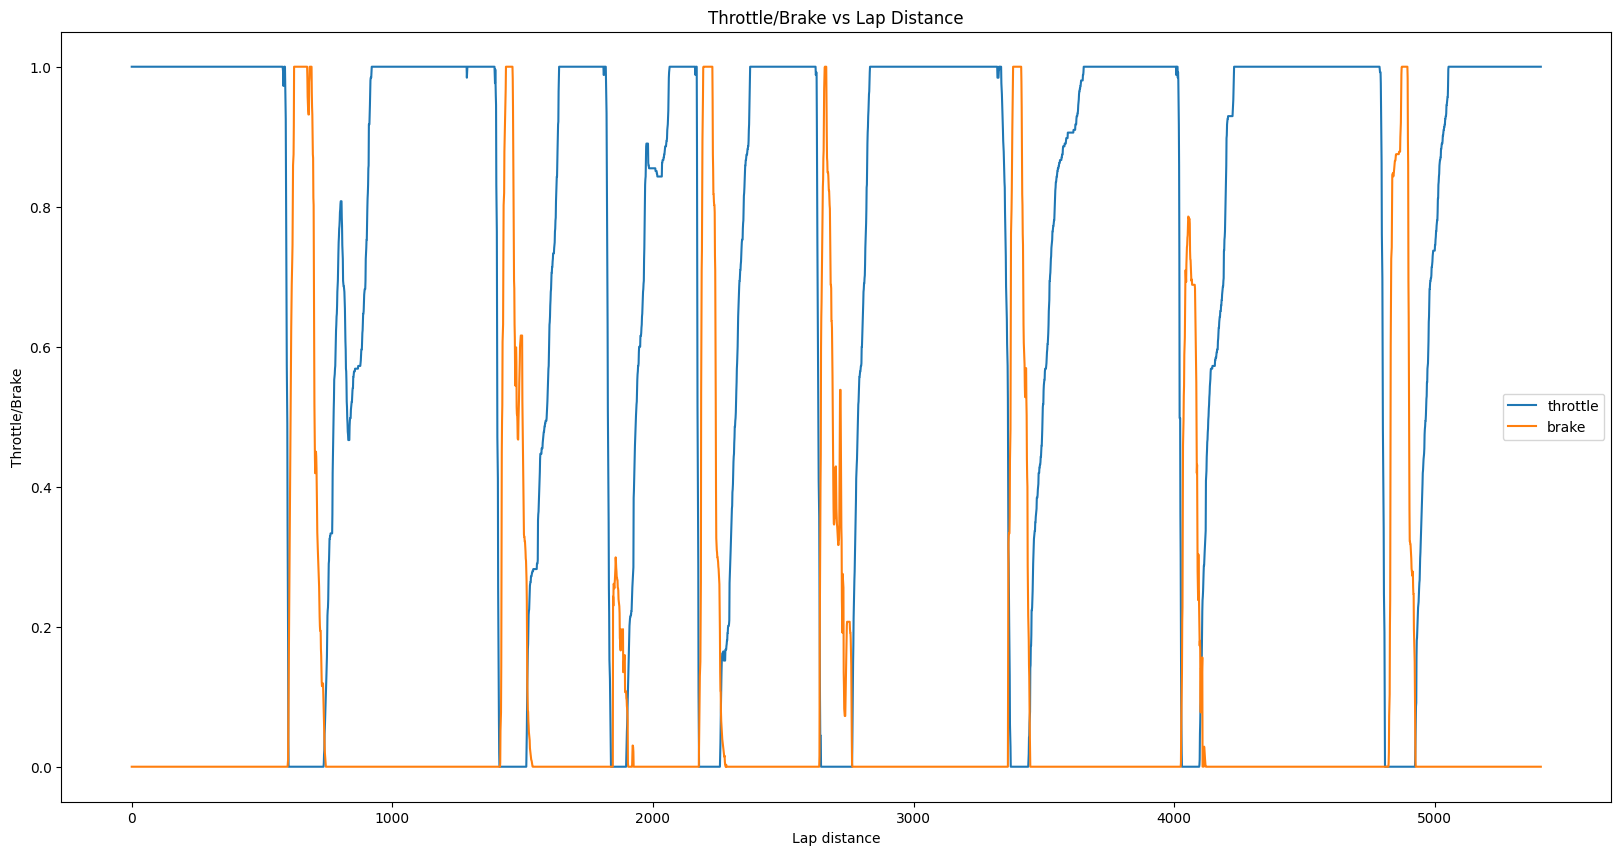

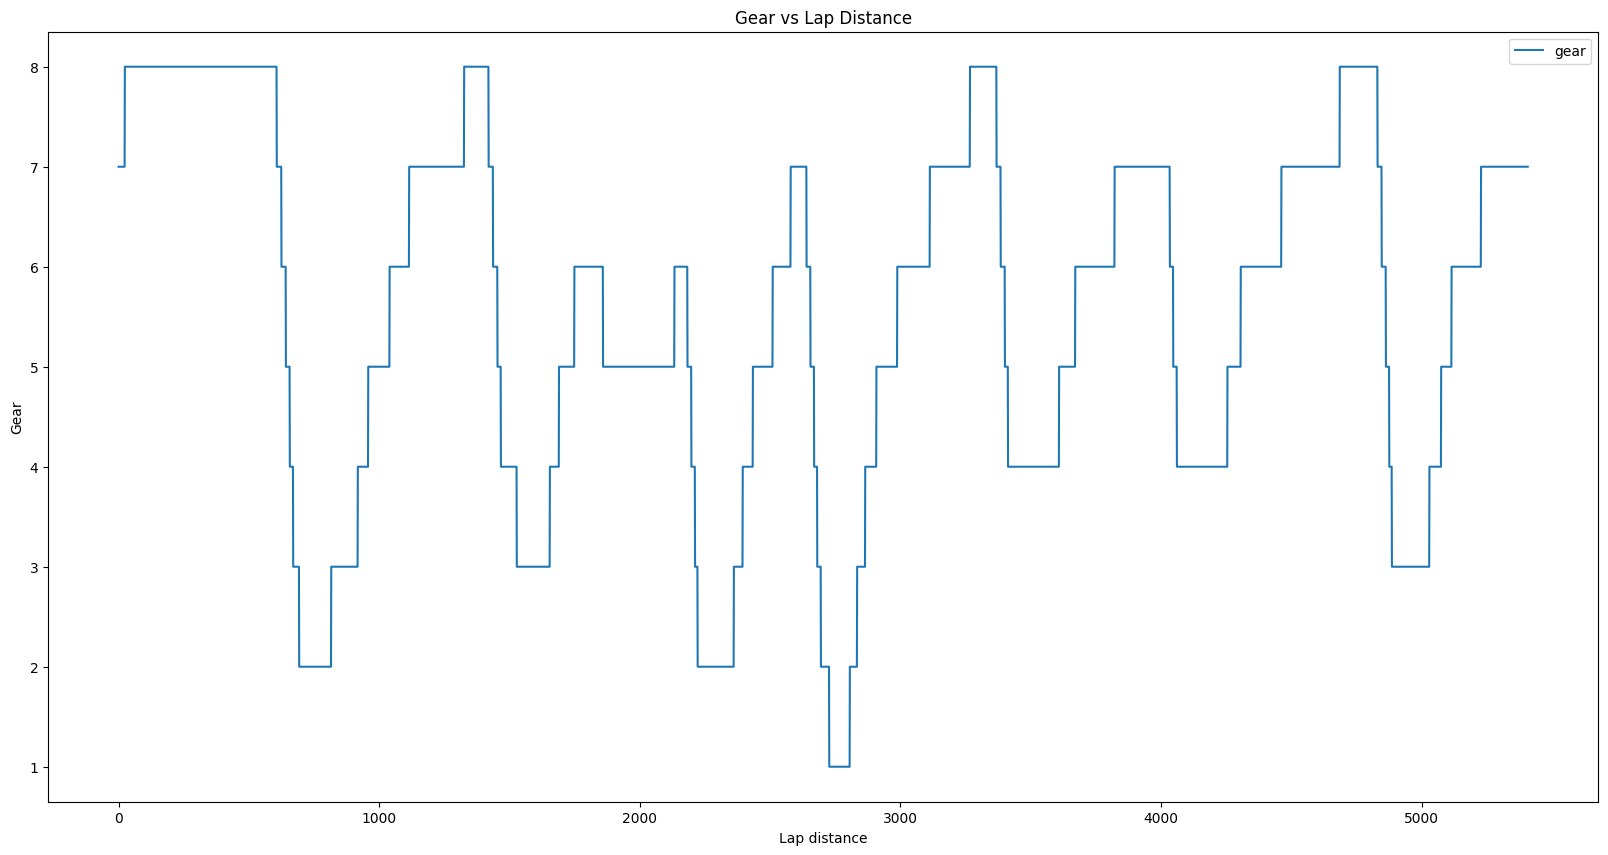

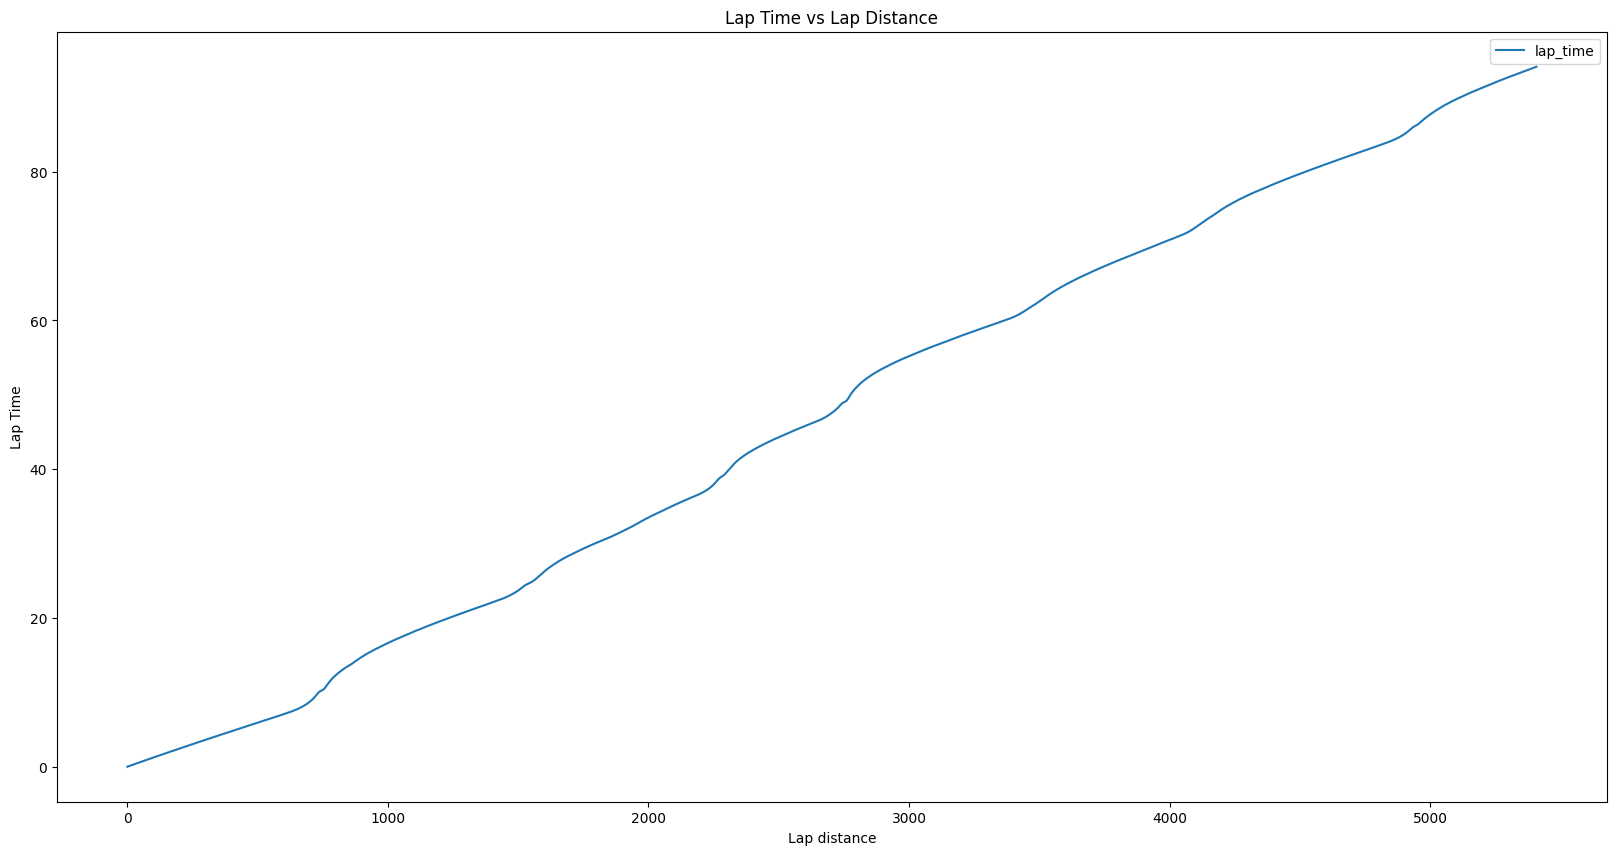

In [238]:
fastestLap = validLaps[validLaps['lap_time'] == validLaps['lap_time'].min()]['lapNum']
lap_data = df[df['lapNum'] == fastestLap.values[0]]

throttle_break = lap_data[['throttle', 'brake']].reset_index(drop=True)
gear_data = lap_data[['gear']].reset_index(drop=True)
lap_distance_time = lap_data[['lap_distance', 'lap_time']].reset_index(drop=True)

compound = df[df['lapNum'] == fastestLap.values[0]]['tyre_compound_0'].values[0]

print("Tyre Compound:", visualCompoundMap[compound], actualCompoundMap[compound])

throttle_break.plot(xlabel="Lap distance", ylabel="Throttle/Brake", title="Throttle/Brake vs Lap Distance", figsize=(20,10))
gear_data.plot(xlabel="Lap distance", ylabel="Gear", title="Gear vs Lap Distance", figsize=(20,10))
lap_distance_time.plot(xlabel="Lap distance", ylabel="Lap Time", title="Lap Time vs Lap Distance", figsize=(20,10), x="lap_distance", y="lap_time")

plt.show()

## Lap Comparison

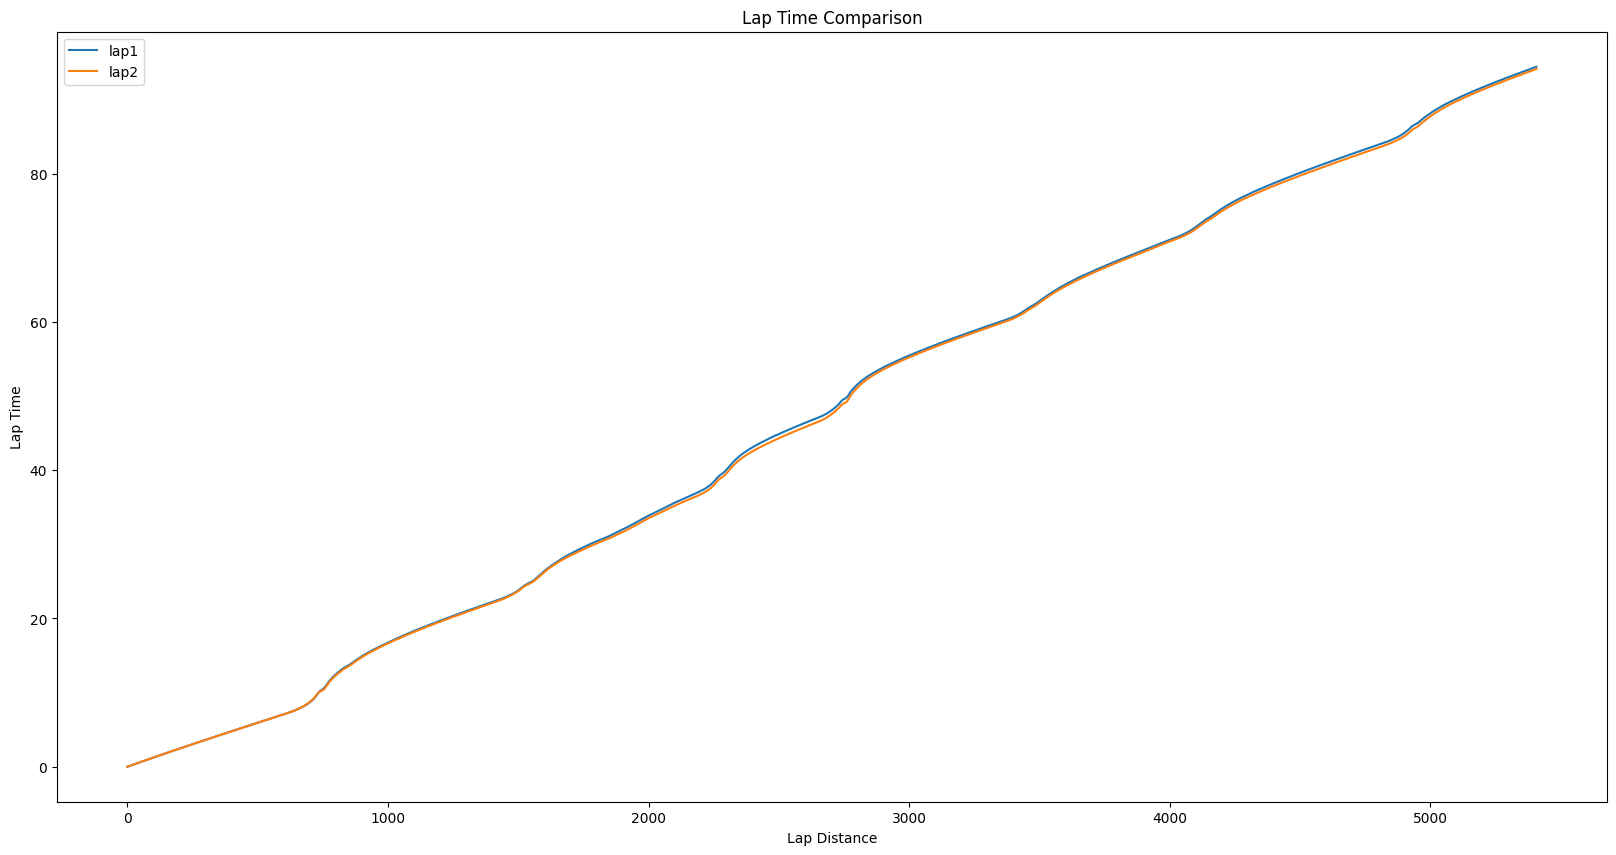

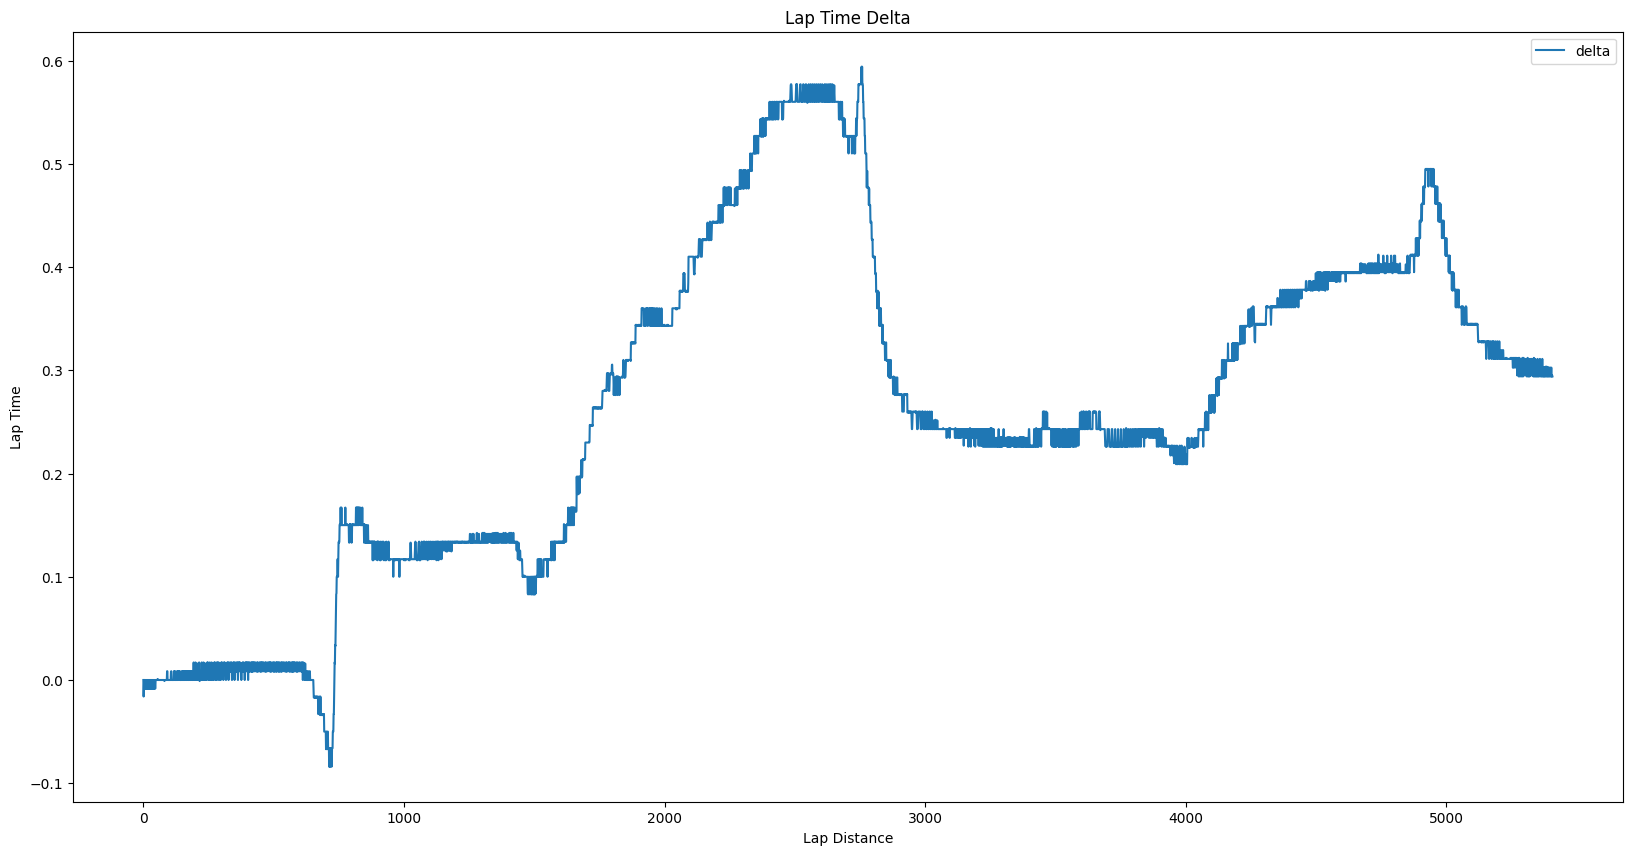

In [239]:
lap1 = 12
lap2 = 13

lap1_times = df[df['lapNum'] == lap1]['lap_time'].reset_index(drop=True)
lap2_times = df[df['lapNum'] == lap2]['lap_time'].reset_index(drop=True)

compare_df = pd.DataFrame({
    'lap1': lap1_times,
    'lap2': lap2_times
})

compare_df.plot(title="Lap Time Comparison", figsize=(20,10), xlabel="Lap Distance", ylabel="Lap Time")

compare_df['delta'] = compare_df['lap1'] - compare_df['lap2']
compare_df.plot(title="Lap Time Delta", figsize=(20,10), xlabel="Lap Distance", ylabel="Lap Time", y="delta")

plt.show()